**ANALYSIS OF ACCIDENTS IN USA**



---



**Datasets**

---


          
Car Accidents in USA
             
             
Format: CSV




---



NYC Motor Vehicle Collisions - Crashes  
             
             
Format: JSON
             
URL:  https://data.cityofnewyork.us/api/views/h9gi-nx95/rows.json?accessType=DOWNLOAD


---



**Importing Libraries**

---



In [ ]:
#importing the necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import urllib.request
import json


**Data Loading**


---



Structured Data (CSV)


---



In [ ]:
#mounting google drive to access files
from google.colab import drive

drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
#reading the csv file containing vehicle information
df_raw_veh = pd.read_csv('/content/drive/MyDrive/final project scripting/Datasets/veh_20.csv',sep=",",encoding = 'ISO-8859-1')
df_raw_veh.head()

<ipython-input-4-ac1480d9a4ae>:2: DtypeWarning: Columns (45,47,127) have mixed types. Specify dtype option on import or set low_memory=False.
  df_raw_veh = pd.read_csv('/content/drive/MyDrive/final project scripting/Datasets/veh_20.csv',sep=",",encoding = 'ISO-8859-1')


,CASENUM,VEH_NO,STRATUM,STRATUMNAME,REGION,REGIONNAME,PSU,PJ,PSU_VAR,URBANICITY,...,PCRASH1_IM,PCRASH1_IMNAME,MXVSEV_IM,MXVSEV_IMNAME,NUMINJ_IM,NUMINJ_IMNAME,V_ALCH_IM,V_ALCH_IMNAME,PSUSTRAT,WEIGHT
0,202002121240,1,9,Stratum 9 - LMY PV No Injuries in Crash,4,"West (MT, ID, WA, OR, CA, NV, NM, AZ, UT, CO, ...",20,4140,20,2,...,1,Going Straight,0,No Apparent Injury (O),0,No Person Injured in Vehicle,2,No Alcohol Involved,25,161.358280
1,202002121240,2,9,Stratum 9 - LMY PV No Injuries in Crash,4,"West (MT, ID, WA, OR, CA, NV, NM, AZ, UT, CO, ...",20,4140,20,2,...,1,Going Straight,0,No Apparent Injury (O),0,No Person Injured in Vehicle,2,No Alcohol Involved,25,161.358280
2,202002121829,1,8,Stratum 8 - NLMY PV Minor Injury,3,"South (MD, DE, DC, WV, VA, KY, TN, NC, SC, GA,...",28,4139,28,1,...,1,Going Straight,2,Suspected Minor Injury (B),1,1,2,No Alcohol Involved,11,131.962215
3,202002121849,1,9,Stratum 9 - LMY PV No Injuries in Crash,3,"South (MD, DE, DC, WV, VA, KY, TN, NC, SC, GA,...",12,4142,12,1,...,1,Going Straight,0,No Apparent Injury (O),0,No Person Injured in Vehicle,2,No Alcohol Involved,12,165.957768
4,202002121849,2,9,Stratum 9 - LMY PV No Injuries in Crash,3,"South (MD, DE, DC, WV, VA, KY, TN, NC, SC, GA,...",12,4142,12,1,...,2,Decelerating in Road,0,No Apparent Injury (O),0,No Person Injured in Vehicle,2,No Alcohol Involved,12,165.957768


In [ ]:
#filtering out the necessary columns for analysis
vehicle_df = df_raw_veh[['CASENUM','STRATUMNAME', 'REGIONNAME','URBANICITYNAME','MONTHNAME','HOURNAME','HARM_EVNAME','MAN_COLLNAME','HIT_RUNNAME','V_ConfigNAME','BUS_USENAME','TRAV_SPNAME','DEFORMEDNAME','MAX_VSEVNAME','NUM_INJVNAME','VSPD_LIMNAME','VSURCONDNAME','VPICBODYCLASSNAME']]

In [ ]:
#renaming the columns and exploring the data
vehicle_df.set_axis(['Case No.', 'Strat Injuries', 'Region','Rural/Urban','Month','Hour','Harmed','Collision Type','Hit & Run','Truck?','Bus?','Speed of car','Damage','Injury','In Vehicle Injury','Speed Limit','Road Condition','Vehicle type'], axis='columns', inplace=True)
vehicle_df.head()

<ipython-input-6-c9de4a769776>:2: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  vehicle_df.set_axis(['Case No.', 'Strat Injuries', 'Region','Rural/Urban','Month','Hour','Harmed','Collision Type','Hit & Run','Truck?','Bus?','Speed of car','Damage','Injury','In Vehicle Injury','Speed Limit','Road Condition','Vehicle type'], axis='columns', inplace=True)


,Case No.,Strat Injuries,Region,Rural/Urban,Month,Hour,Harmed,Collision Type,Hit & Run,Truck?,Bus?,Speed of car,Damage,Injury,In Vehicle Injury,Speed Limit,Road Condition,Vehicle type
0,202002121240,Stratum 9 - LMY PV No Injuries in Crash,"West (MT, ID, WA, OR, CA, NV, NM, AZ, UT, CO, ...",Rural Area,January,8:00am-8:59am,Motor Vehicle In-Transport,Angle,No,Not Applicable,Not a Bus,025 MPH,Functional Damage,No Apparent Injury (O),No Person Injured in Vehicle,Not Reported,Snow,Sedan/Saloon
1,202002121240,Stratum 9 - LMY PV No Injuries in Crash,"West (MT, ID, WA, OR, CA, NV, NM, AZ, UT, CO, ...",Rural Area,January,8:00am-8:59am,Motor Vehicle In-Transport,Angle,No,Not Applicable,Not a Bus,030 MPH,Functional Damage,No Apparent Injury (O),No Person Injured in Vehicle,Not Reported,Snow,Pickup
2,202002121829,Stratum 8 - NLMY PV Minor Injury,"South (MD, DE, DC, WV, VA, KY, TN, NC, SC, GA,...",Urban Area,January,1:00am-1:59am,Tree (Standing Only),The First Harmful Event was Not a Collision wi...,No,Not Applicable,Not a Bus,045 MPH,Disabling Damage,Suspected Minor Injury (B),1,25 MPH,Dry,Sedan/Saloon
3,202002121849,Stratum 9 - LMY PV No Injuries in Crash,"South (MD, DE, DC, WV, VA, KY, TN, NC, SC, GA,...",Urban Area,January,1:00pm-1:59pm,Motor Vehicle In-Transport,Front-to-Rear,Yes,Not Applicable,Not a Bus,015 MPH,Reported as Unknown,Unknown/Not Reported,All Persons in Vehicle are unknown if Injured,45 MPH,Dry,Unknown
4,202002121849,Stratum 9 - LMY PV No Injuries in Crash,"South (MD, DE, DC, WV, VA, KY, TN, NC, SC, GA,...",Urban Area,January,1:00pm-1:59pm,Motor Vehicle In-Transport,Front-to-Rear,No,Not Applicable,Not a Bus,010 MPH,Minor Damage,No Apparent Injury (O),No Person Injured in Vehicle,45 MPH,Dry,Sedan/Saloon


In [ ]:
#reading the csv file containing people's information
df_raw_per = pd.read_csv('/content/drive/MyDrive/final project scripting/Datasets/pers_20.csv',sep=",",encoding = 'ISO-8859-1')

In [ ]:
#filtering out necessary column for analysis
person_df = df_raw_per[['CASENUM','PER_NO','REGIONNAME','PSU_VAR','URBANICITYNAME','MONTHNAME','HARM_EVNAME','MAN_COLLNAME','BODY_TYPNAME','MOD_YEAR','IMPACT1NAME','AGE','SEXNAME','SEAT_POSNAME','AIR_BAGNAME','DRINKINGNAME','DRUGSNAME','HOSPITALNAME','VPICBODYCLASSNAME']]
person_df.columns.to_list()

['CASENUM',
 'PER_NO',
 'REGIONNAME',
 'PSU_VAR',
 'URBANICITYNAME',
 'MONTHNAME',
 'HARM_EVNAME',
 'MAN_COLLNAME',
 'BODY_TYPNAME',
 'MOD_YEAR',
 'IMPACT1NAME',
 'AGE',
 'SEXNAME',
 'SEAT_POSNAME',
 'AIR_BAGNAME',
 'DRINKINGNAME',
 'DRUGSNAME',
 'HOSPITALNAME',
 'VPICBODYCLASSNAME']

In [ ]:
#renaming the columns
person_df.set_axis(['Case No.','Person No.','Region','PSU','Rural/Urban','Month','Harmed','Collision Type','Body Type','Car Model Year','Impact','Age','Sex','Seat Position','Air Bag','Alcohol','Drugs','Hospital','Vehicle Type'],axis = 'columns',inplace=True)

<ipython-input-12-2f9e51902487>:2: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  person_df.set_axis(['Case No.','Person No.','Region','PSU','Rural/Urban','Month','Harmed','Collision Type','Body Type','Car Model Year','Impact','Age','Sex','Seat Position','Air Bag','Alcohol','Drugs','Hospital','Vehicle Type'],axis = 'columns',inplace=True)


In [ ]:
#exploring the first few columns of person data
person_df.head()

,Case No.,Person No.,Region,PSU,Rural/Urban,Month,Harmed,Collision Type,Body Type,Car Model Year,Impact,Age,Sex,Seat Position,Air Bag,Alcohol,Drugs,Hospital,Vehicle Type
0,202002121240,1,"West (MT, ID, WA, OR, CA, NV, NM, AZ, UT, CO, ...",20,Rural Area,January,Motor Vehicle In-Transport,Angle,"4-door sedan, hardtop",2018.0,8 Clock Point,61,Female,"Front Seat, Left Side",Not Deployed,Not Reported,Not Reported,Not Transported for Treatment,Sedan/Saloon
1,202002121240,1,"West (MT, ID, WA, OR, CA, NV, NM, AZ, UT, CO, ...",20,Rural Area,January,Motor Vehicle In-Transport,Angle,Light Pickup,2007.0,12 Clock Point,26,Male,"Front Seat, Left Side",Not Deployed,Not Reported,Not Reported,Not Transported for Treatment,Pickup
2,202002121829,1,"South (MD, DE, DC, WV, VA, KY, TN, NC, SC, GA,...",28,Urban Area,January,Tree (Standing Only),The First Harmful Event was Not a Collision wi...,"4-door sedan, hardtop",2013.0,12 Clock Point,23,Male,"Front Seat, Left Side",Deployed- Combination,No (Alcohol Not Involved),No (drugs not involved),EMS Ground,Sedan/Saloon
3,202002121849,1,"South (MD, DE, DC, WV, VA, KY, TN, NC, SC, GA,...",12,Urban Area,January,Motor Vehicle In-Transport,Front-to-Rear,Other or Unknown automobile type,9999.0,12 Clock Point,998,Not Reported,"Front Seat, Left Side",Not Reported,Not Reported,Not Reported,Not Transported for Treatment,Unknown
4,202002121849,1,"South (MD, DE, DC, WV, VA, KY, TN, NC, SC, GA,...",12,Urban Area,January,Motor Vehicle In-Transport,Front-to-Rear,"4-door sedan, hardtop",2018.0,6 Clock Point,21,Female,"Front Seat, Left Side",Not Deployed,No (Alcohol Not Involved),No (drugs not involved),Not Transported for Treatment,Sedan/Saloon


Semi Structures data (JSON)


---



In [ ]:
nyc_accidents_url = 'https://data.cityofnewyork.us/api/views/h9gi-nx95/rows.json?accessType=DOWNLOAD'


response = urllib.request.urlopen(nyc_accidents_url)
response.code

# As the response code is 200, We can code further

200

In [ ]:
json_string = response.read().decode('utf-8')

In [ ]:
eq_parsed_json = json.loads(json_string)

nyc_accident_data = eq_parsed_json['data']
nyc_accident_data[1]

['row-t9dc~q8a7~jwk4',
 '00000000-0000-0000-504A-3882B5C655F7',
 0,
 1648594368,
 None,
 1648594369,
 None,
 '{ }',
 '2022-03-26T00:00:00',
 '11:45',
 None,
 None,
 None,
 None,
 None,
 'QUEENSBORO BRIDGE UPPER',
 None,
 None,
 '1',
 '0',
 '0',
 '0',
 '0',
 '0',
 '1',
 '0',
 'Pavement Slippery',
 None,
 None,
 None,
 None,
 '4513547',
 'Sedan',
 None,
 None,
 None,
 None]

In [ ]:
column_names = [col['name'] for col in eq_parsed_json['meta']['view']['columns']]
#Extracted the column names from the 'eq_parsed_json' JSON data

nyc_df = pd.DataFrame(nyc_accident_data, columns=column_names)
#Created a DataFrame 'nyc_df' using the 'nyc_accident_data' and specified column names

print(nyc_df.columns)

nyc_df.head(5)


Index(['sid', 'id', 'position', 'created_at', 'created_meta', 'updated_at',
       'updated_meta', 'meta', 'CRASH DATE', 'CRASH TIME', 'BOROUGH',
       'ZIP CODE', 'LATITUDE', 'LONGITUDE', 'LOCATION', 'ON STREET NAME',
       'CROSS STREET NAME', 'OFF STREET NAME', 'NUMBER OF PERSONS INJURED',
       'NUMBER OF PERSONS KILLED', 'NUMBER OF PEDESTRIANS INJURED',
       'NUMBER OF PEDESTRIANS KILLED', 'NUMBER OF CYCLIST INJURED',
       'NUMBER OF CYCLIST KILLED', 'NUMBER OF MOTORIST INJURED',
       'NUMBER OF MOTORIST KILLED', 'CONTRIBUTING FACTOR VEHICLE 1',
       'CONTRIBUTING FACTOR VEHICLE 2', 'CONTRIBUTING FACTOR VEHICLE 3',
       'CONTRIBUTING FACTOR VEHICLE 4', 'CONTRIBUTING FACTOR VEHICLE 5',
       'COLLISION_ID', 'VEHICLE TYPE CODE 1', 'VEHICLE TYPE CODE 2',
       'VEHICLE TYPE CODE 3', 'VEHICLE TYPE CODE 4', 'VEHICLE TYPE CODE 5'],
      dtype='object')


,sid,id,position,created_at,created_meta,updated_at,updated_meta,meta,CRASH DATE,CRASH TIME,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,row-rsc3.wgwr-zpi9,00000000-0000-0000-2EDA-D04CF4F72CCD,0,1631659942,None,1631659946,None,{ },2021-09-11T00:00:00,2:39,...,Unspecified,None,None,None,4455765,Sedan,Sedan,None,None,None
1,row-t9dc~q8a7~jwk4,00000000-0000-0000-504A-3882B5C655F7,0,1648594368,None,1648594369,None,{ },2022-03-26T00:00:00,11:45,...,None,None,None,None,4513547,Sedan,None,None,None,None
2,row-gxrs-hm78-w9gs,00000000-0000-0000-B0D5-6682910B6F0B,0,1656975116,None,1656975124,None,{ },2022-06-29T00:00:00,6:55,...,Unspecified,None,None,None,4541903,Sedan,Pick-up Truck,None,None,None
3,row-ih2j-xch6_fenf,00000000-0000-0000-D650-935317BB1EDD,0,1631659942,None,1631659946,None,{ },2021-09-11T00:00:00,9:35,...,None,None,None,None,4456314,Sedan,None,None,None,None
4,row-qe7r_he2n~zchc,00000000-0000-0000-C344-28D447C8ECF4,0,1639785167,None,1639785172,None,{ },2021-12-14T00:00:00,8:13,...,None,None,None,None,4486609,None,None,None,None,None


**Data Cleaning**


---



In [ ]:
#checking for null values in the dataset
null_count = person_df.isna().sum()
print(null_count)

Case No.             0
Person No.           0
Region               0
PSU                  0
Rural/Urban          0
Month                0
Harmed               0
Collision Type       0
Body Type         5077
Car Model Year    5077
Impact            5077
Age                  0
Sex                  0
Seat Position        0
Air Bag              0
Alcohol              0
Drugs                0
Hospital             0
Vehicle Type      5077
dtype: int64


In [ ]:
#replacing the null value with Unspecified to clean the data
person_df['Body Type'].fillna('Unspecified', inplace=True)
person_df['Car Model Year'].fillna('Unspecified', inplace=True)
person_df['Impact'].fillna('Unspecified', inplace=True)
person_df['Vehicle Type'].fillna('Unspecified', inplace=True)

<ipython-input-15-d22f2ec045cf>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  person_df['Body Type'].fillna('Unspecified', inplace=True)
<ipython-input-15-d22f2ec045cf>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  person_df['Car Model Year'].fillna('Unspecified', inplace=True)
<ipython-input-15-d22f2ec045cf>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  person_df['Impact'].fillna('Unspecified', inplace=True)
<ipython-input-15

In [ ]:
#confirming the changes to null values
null_count = person_df.isna().sum()
print(null_count)

Case No.          0
Person No.        0
Region            0
PSU               0
Rural/Urban       0
Month             0
Harmed            0
Collision Type    0
Body Type         0
Car Model Year    0
Impact            0
Age               0
Sex               0
Seat Position     0
Air Bag           0
Alcohol           0
Drugs             0
Hospital          0
Vehicle Type      0
dtype: int64


In [ ]:
#checking for null values
null_count = vehicle_df.isna().sum()
print(null_count)

Case No.             0
Strat Injuries       0
Region               0
Rural/Urban          0
Month                0
Hour                 0
Harmed               0
Collision Type       0
Hit & Run            0
Truck?               0
Bus?                 0
Speed of car         0
Damage               0
Injury               0
In Vehicle Injury    0
Speed Limit          0
Road Condition       0
Vehicle type         0
dtype: int64


In [ ]:
#exploring the data types present in the dataset
print(person_df.dtypes)
print(vehicle_df.dtypes)

Case No.           int64
Person No.         int64
Region            object
PSU                int64
Rural/Urban       object
Month             object
Harmed            object
Collision Type    object
Body Type         object
Car Model Year    object
Impact            object
Age                int64
Sex               object
Seat Position     object
Air Bag           object
Alcohol           object
Drugs             object
Hospital          object
Vehicle Type      object
dtype: object
Case No.              int64
Strat Injuries       object
Region               object
Rural/Urban          object
Month                object
Hour                 object
Harmed               object
Collision Type       object
Hit & Run            object
Truck?               object
Bus?                 object
Speed of car         object
Damage               object
Injury               object
In Vehicle Injury    object
Speed Limit          object
Road Condition       object
Vehicle type         object
dtype: 

Data cleaning for Semi-structured data

In [ ]:
columns_to_keep = ['COLLISION_ID','CRASH DATE', 'CRASH TIME', 'NUMBER OF PERSONS INJURED',
       'NUMBER OF PERSONS KILLED', 'NUMBER OF PEDESTRIANS INJURED',
       'NUMBER OF PEDESTRIANS KILLED', 'NUMBER OF CYCLIST INJURED',
       'NUMBER OF CYCLIST KILLED', 'NUMBER OF MOTORIST INJURED',
       'NUMBER OF MOTORIST KILLED', 'CONTRIBUTING FACTOR VEHICLE 1',
       'CONTRIBUTING FACTOR VEHICLE 2',
       'VEHICLE TYPE CODE 1', 'VEHICLE TYPE CODE 2']

nyc_df = nyc_df[columns_to_keep]

nyc_df.head(10)

,COLLISION_ID,CRASH DATE,CRASH TIME,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,CONTRIBUTING FACTOR VEHICLE 1,CONTRIBUTING FACTOR VEHICLE 2,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2
0,4455765,2021-09-11T00:00:00,2:39,2,0,0,0,0,0,2,0,Aggressive Driving/Road Rage,Unspecified,Sedan,Sedan
1,4513547,2022-03-26T00:00:00,11:45,1,0,0,0,0,0,1,0,Pavement Slippery,None,Sedan,None
2,4541903,2022-06-29T00:00:00,6:55,0,0,0,0,0,0,0,0,Following Too Closely,Unspecified,Sedan,Pick-up Truck
3,4456314,2021-09-11T00:00:00,9:35,0,0,0,0,0,0,0,0,Unspecified,None,Sedan,None
4,4486609,2021-12-14T00:00:00,8:13,0,0,0,0,0,0,0,0,None,None,None,None
5,4407458,2021-04-14T00:00:00,12:47,0,0,0,0,0,0,0,0,Unspecified,Unspecified,Dump,Sedan
6,4486555,2021-12-14T00:00:00,17:05,0,0,0,0,0,0,0,0,Passing Too Closely,Unspecified,Sedan,Tractor Truck Diesel
7,4486660,2021-12-14T00:00:00,8:17,2,0,0,0,0,0,2,0,Unspecified,Unspecified,Sedan,Sedan
8,4487074,2021-12-14T00:00:00,21:10,0,0,0,0,0,0,0,0,Driver Inexperience,Unspecified,Sedan,None
9,4486519,2021-12-14T00:00:00,14:58,0,0,0,0,0,0,0,0,Passing Too Closely,Unspecified,Sedan,Station Wagon/Sport Utility Vehicle


In [ ]:
# As we just want to focus on data for 2020, we are filtering and just keeping the data for year 2022 in nyc_df

# Converting 'CRASH DATE' to datetime format
nyc_df['CRASH DATE'] = pd.to_datetime(nyc_df['CRASH DATE'])

# Creating a new column for the year
nyc_df['YEAR'] = nyc_df['CRASH DATE'].dt.year

# Filtering the dataset to keep only the rows for the year 2020
nyc_df = nyc_df[nyc_df['YEAR'] == 2020]

nyc_df

,COLLISION_ID,CRASH DATE,CRASH TIME,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,CONTRIBUTING FACTOR VEHICLE 1,CONTRIBUTING FACTOR VEHICLE 2,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,YEAR
451,4277087,2020-01-21,15:49,0,0,0,0,0,0,0,0,Driver Inattention/Distraction,Unspecified,Sedan,Station Wagon/Sport Utility Vehicle,2020
872,4407790,2020-04-15,15:20,0,0,0,0,0,0,0,0,Driver Inattention/Distraction,Unspecified,Sedan,Tractor Truck Diesel,2020
1781,4408441,2020-04-17,1:50,1,0,0,0,0,0,1,0,Driver Inattention/Distraction,Unspecified,Sedan,None,2020
2314,4345591,2020-09-06,18:05,0,1,0,0,0,0,0,1,Unsafe Lane Changing,Following Too Closely,Station Wagon/Sport Utility Vehicle,Motorcycle,2020
6079,4411064,2020-04-02,10:07,0,0,0,0,0,0,0,0,Passing or Lane Usage Improper,Passing or Lane Usage Improper,Sedan,Sedan,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1957404,4584176,2020-11-17,13:30,0,0,0,0,0,0,0,0,Driver Inattention/Distraction,Unspecified,Sedan,Sedan,2020
1966786,4590623,2020-12-17,16:00,0,0,0,0,0,0,0,0,Unspecified,None,Sedan,None,2020
1984086,4307427,2020-04-03,17:00,0,0,0,0,0,0,0,0,Driver Inattention/Distraction,Unspecified,Sedan,PK,2020
2001705,4377846,2020-12-12,14:57,2,0,0,0,0,0,2,0,Unspecified,Unspecified,Sedan,bus,2020


In [ ]:
#checking for null values

nyc_null_count = nyc_df.isna().sum()
print(nyc_null_count)


COLLISION_ID                         0
CRASH DATE                           0
CRASH TIME                           0
NUMBER OF PERSONS INJURED            0
NUMBER OF PERSONS KILLED             0
NUMBER OF PEDESTRIANS INJURED        0
NUMBER OF PEDESTRIANS KILLED         0
NUMBER OF CYCLIST INJURED            0
NUMBER OF CYCLIST KILLED             0
NUMBER OF MOTORIST INJURED           0
NUMBER OF MOTORIST KILLED            0
CONTRIBUTING FACTOR VEHICLE 1      512
CONTRIBUTING FACTOR VEHICLE 2    24624
VEHICLE TYPE CODE 1               1072
VEHICLE TYPE CODE 2              34128
YEAR                                 0
dtype: int64


In [ ]:
# replacing missing values with 'Unspecified' value
nyc_df['CONTRIBUTING FACTOR VEHICLE 1'].fillna('Unspecified', inplace=True)
nyc_df['CONTRIBUTING FACTOR VEHICLE 2'].fillna('Unspecified', inplace=True)
nyc_df['VEHICLE TYPE CODE 1'].fillna('Unspecified', inplace=True)
nyc_df['VEHICLE TYPE CODE 2'].fillna('Unspecified', inplace=True)

#checking for missing values again
nyc_null_count = nyc_df.isna().sum()
print(nyc_null_count)

COLLISION_ID                     0
CRASH DATE                       0
CRASH TIME                       0
NUMBER OF PERSONS INJURED        0
NUMBER OF PERSONS KILLED         0
NUMBER OF PEDESTRIANS INJURED    0
NUMBER OF PEDESTRIANS KILLED     0
NUMBER OF CYCLIST INJURED        0
NUMBER OF CYCLIST KILLED         0
NUMBER OF MOTORIST INJURED       0
NUMBER OF MOTORIST KILLED        0
CONTRIBUTING FACTOR VEHICLE 1    0
CONTRIBUTING FACTOR VEHICLE 2    0
VEHICLE TYPE CODE 1              0
VEHICLE TYPE CODE 2              0
YEAR                             0
dtype: int64


**Analysis**


---



In [ ]:
#exploring the data set
person_df.head()


,Case No.,Person No.,Region,PSU,Rural/Urban,Month,Harmed,Collision Type,Body Type,Car Model Year,Impact,Age,Sex,Seat Position,Air Bag,Alcohol,Drugs,Hospital,Vehicle Type
0,202002121240,1,"West (MT, ID, WA, OR, CA, NV, NM, AZ, UT, CO, ...",20,Rural Area,January,Motor Vehicle In-Transport,Angle,"4-door sedan, hardtop",2018.0,8 Clock Point,61,Female,"Front Seat, Left Side",Not Deployed,Not Reported,Not Reported,Not Transported for Treatment,Sedan/Saloon
1,202002121240,1,"West (MT, ID, WA, OR, CA, NV, NM, AZ, UT, CO, ...",20,Rural Area,January,Motor Vehicle In-Transport,Angle,Light Pickup,2007.0,12 Clock Point,26,Male,"Front Seat, Left Side",Not Deployed,Not Reported,Not Reported,Not Transported for Treatment,Pickup
2,202002121829,1,"South (MD, DE, DC, WV, VA, KY, TN, NC, SC, GA,...",28,Urban Area,January,Tree (Standing Only),The First Harmful Event was Not a Collision wi...,"4-door sedan, hardtop",2013.0,12 Clock Point,23,Male,"Front Seat, Left Side",Deployed- Combination,No (Alcohol Not Involved),No (drugs not involved),EMS Ground,Sedan/Saloon
3,202002121849,1,"South (MD, DE, DC, WV, VA, KY, TN, NC, SC, GA,...",12,Urban Area,January,Motor Vehicle In-Transport,Front-to-Rear,Other or Unknown automobile type,9999.0,12 Clock Point,998,Not Reported,"Front Seat, Left Side",Not Reported,Not Reported,Not Reported,Not Transported for Treatment,Unknown
4,202002121849,1,"South (MD, DE, DC, WV, VA, KY, TN, NC, SC, GA,...",12,Urban Area,January,Motor Vehicle In-Transport,Front-to-Rear,"4-door sedan, hardtop",2018.0,6 Clock Point,21,Female,"Front Seat, Left Side",Not Deployed,No (Alcohol Not Involved),No (drugs not involved),Not Transported for Treatment,Sedan/Saloon


In [ ]:
#Checking the summary statistics of data
person_df.describe(include='all')

,Case No.,Person No.,Region,PSU,Rural/Urban,Month,Harmed,Collision Type,Body Type,Car Model Year,Impact,Age,Sex,Seat Position,Air Bag,Alcohol,Drugs,Hospital,Vehicle Type
count,1.319620e+05,131962.000000,131962,131962.000000,131962,131962,131962,131962,131962,131962.0,131962,131962.000000,131962,131962,131962,131962,131962,131962,131962
unique,NaN,NaN,4,NaN,2,12,56,11,66,73.0,26,NaN,4,28,10,4,4,9,65
top,NaN,NaN,"South (MD, DE, DC, WV, VA, KY, TN, NC, SC, GA,...",NaN,Urban Area,October,Motor Vehicle In-Transport,Front-to-Rear,"4-door sedan, hardtop",2017.0,12 Clock Point,NaN,Male,"Front Seat, Left Side",Not Deployed,No (Alcohol Not Involved),Not Reported,Not Transported for Treatment,Sedan/Saloon
freq,NaN,NaN,71024,NaN,100574,14994,100007,40777,43008,10119.0,52383,NaN,71387,94721,93217,64747,81755,103870,45221
mean,2.020026e+11,1.360232,NaN,52.376927,NaN,NaN,NaN,NaN,NaN,NaN,NaN,115.101241,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,2.153904e+05,0.759721,NaN,33.136287,NaN,NaN,NaN,NaN,NaN,NaN,NaN,263.046916,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,2.020021e+11,1.000000,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,2.020025e+11,1.000000,NaN,32.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,2.020026e+11,1.000000,NaN,48.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,2.020028e+11,1.000000,NaN,67.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,56.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Question : Which type of areas are more affected by road accidents?


Urban Area    100574
Rural Area     31388
Name: Rural/Urban, dtype: int64


<Axes: ylabel='Rural/Urban'>

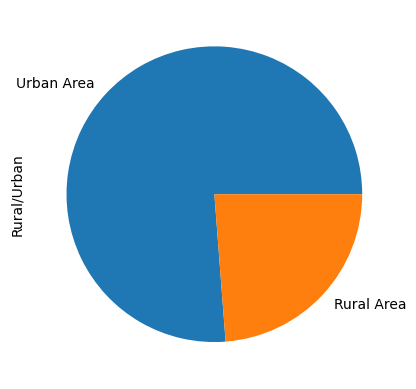

In [ ]:
#calculating accident based on city and plotting pie chart to visualize
city = person_df['Rural/Urban'].value_counts().nlargest(5)
print(city)
city.plot.pie()

Question: How are road accidents affected across various US regions?

<Axes: ylabel='Region'>

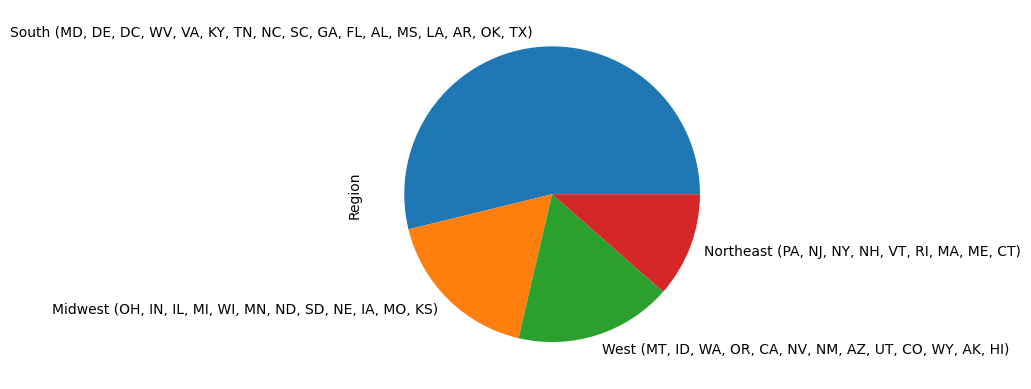

In [ ]:
#Calculating the road accidents based on regions
Region=person_df['Region'].value_counts()

Region.plot.pie()

Question: Which vehicle type is most affected by road accidents?

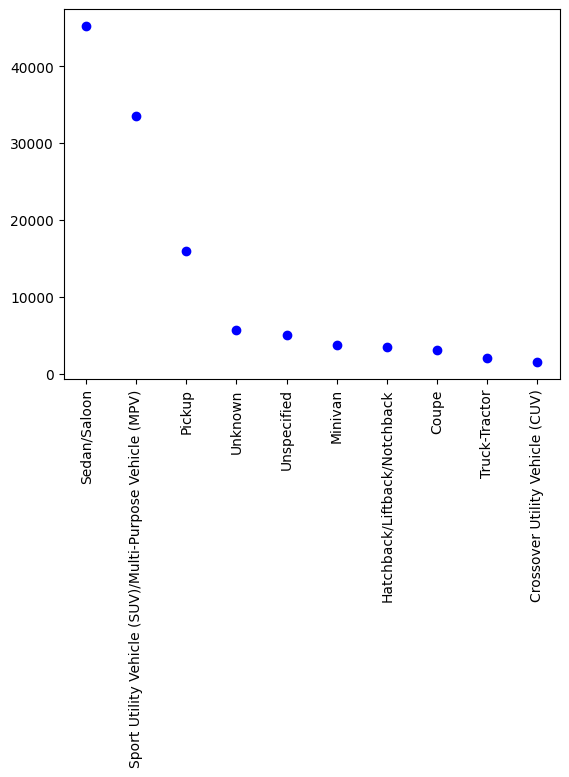

In [ ]:
#grouping the data based on vehicle type
group=person_df.groupby('Vehicle Type')['Case No.'].count().sort_values(ascending=False)

#printing the TOP 10 most affected vehicle types
T10= group.head(10)
plt.xticks(rotation=90)
plt.scatter(T10.index,T10.values, color='blue', marker='o', label='Scatter Plot')


Question: Which age groups are most involved with road accidents?


<ipython-input-27-fbd698d13cf0>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  person_df['age_group']=person_df['Age'].apply(categorize_age)


age_group
0-10 years      6633
11-25 years    32845
26-40 years    34414
41-60 years    30975
61-75 years    12850
75+ years      14245
Name: Case No., dtype: int64


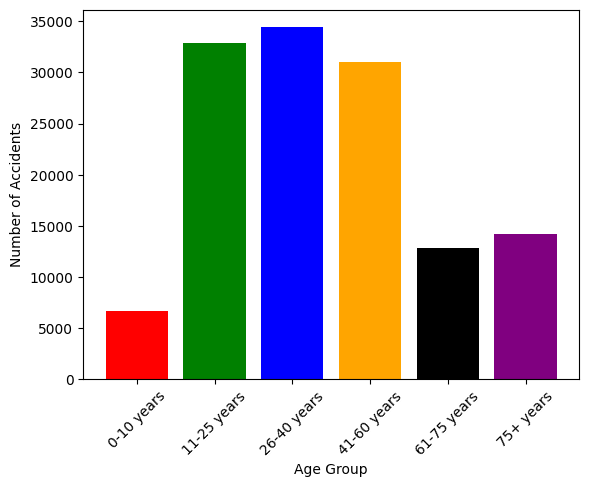

In [ ]:
#storing the age column into a new variable
age=person_df['Age']

#creating function to create age groups
def categorize_age(age):
    if age <= 10:
        return '0-10 years'
    elif 11 <= age <= 25:
        return '11-25 years'
    elif 26 <= age <= 40:
        return '26-40 years'
    elif 41 <= age <= 60:
        return '41-60 years'
    elif 61 <= age <= 75:
        return '61-75 years'
    else:
        return '75+ years'

#creating new column to store the age groups
person_df['age_group']=person_df['Age'].apply(categorize_age)

#calculating the accidents based on each age group
group_age=person_df.groupby('age_group')['Case No.'].count()

print(group_age)

colors = ['red', 'green', 'blue', 'orange','black','purple']

# Create a bar chart
plt.bar(group_age.index, group_age.values, color=colors)

plt.xticks(rotation=45)
# Set labels and title
plt.xlabel('Age Group')
plt.ylabel('Number of Accidents')

# Display the plot
plt.show()

In [ ]:
#Exploring data
vehicle_df.head()

,Case No.,Strat Injuries,Region,Rural/Urban,Month,Hour,Harmed,Collision Type,Hit & Run,Truck?,Bus?,Speed of car,Damage,Injury,In Vehicle Injury,Speed Limit,Road Condition,Vehicle type
0,202002121240,Stratum 9 - LMY PV No Injuries in Crash,"West (MT, ID, WA, OR, CA, NV, NM, AZ, UT, CO, ...",Rural Area,January,8:00am-8:59am,Motor Vehicle In-Transport,Angle,No,Not Applicable,Not a Bus,025 MPH,Functional Damage,No Apparent Injury (O),No Person Injured in Vehicle,Not Reported,Snow,Sedan/Saloon
1,202002121240,Stratum 9 - LMY PV No Injuries in Crash,"West (MT, ID, WA, OR, CA, NV, NM, AZ, UT, CO, ...",Rural Area,January,8:00am-8:59am,Motor Vehicle In-Transport,Angle,No,Not Applicable,Not a Bus,030 MPH,Functional Damage,No Apparent Injury (O),No Person Injured in Vehicle,Not Reported,Snow,Pickup
2,202002121829,Stratum 8 - NLMY PV Minor Injury,"South (MD, DE, DC, WV, VA, KY, TN, NC, SC, GA,...",Urban Area,January,1:00am-1:59am,Tree (Standing Only),The First Harmful Event was Not a Collision wi...,No,Not Applicable,Not a Bus,045 MPH,Disabling Damage,Suspected Minor Injury (B),1,25 MPH,Dry,Sedan/Saloon
3,202002121849,Stratum 9 - LMY PV No Injuries in Crash,"South (MD, DE, DC, WV, VA, KY, TN, NC, SC, GA,...",Urban Area,January,1:00pm-1:59pm,Motor Vehicle In-Transport,Front-to-Rear,Yes,Not Applicable,Not a Bus,015 MPH,Reported as Unknown,Unknown/Not Reported,All Persons in Vehicle are unknown if Injured,45 MPH,Dry,Unknown
4,202002121849,Stratum 9 - LMY PV No Injuries in Crash,"South (MD, DE, DC, WV, VA, KY, TN, NC, SC, GA,...",Urban Area,January,1:00pm-1:59pm,Motor Vehicle In-Transport,Front-to-Rear,No,Not Applicable,Not a Bus,010 MPH,Minor Damage,No Apparent Injury (O),No Person Injured in Vehicle,45 MPH,Dry,Sedan/Saloon


In [ ]:
#Checking the summary statistics of data
vehicle_df.describe()

,Case No.
count,9.471800e+04
mean,2.020026e+11
std,2.158497e+05
min,2.020021e+11
25%,2.020025e+11
50%,2.020026e+11
75%,2.020028e+11
max,2.020030e+11


Question: What is the trend of accidents over time?

<ipython-input-32-63a424efaf18>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='Month', y='Case No.', data=vehicle_df, estimator='count', ci=None, color='orange')


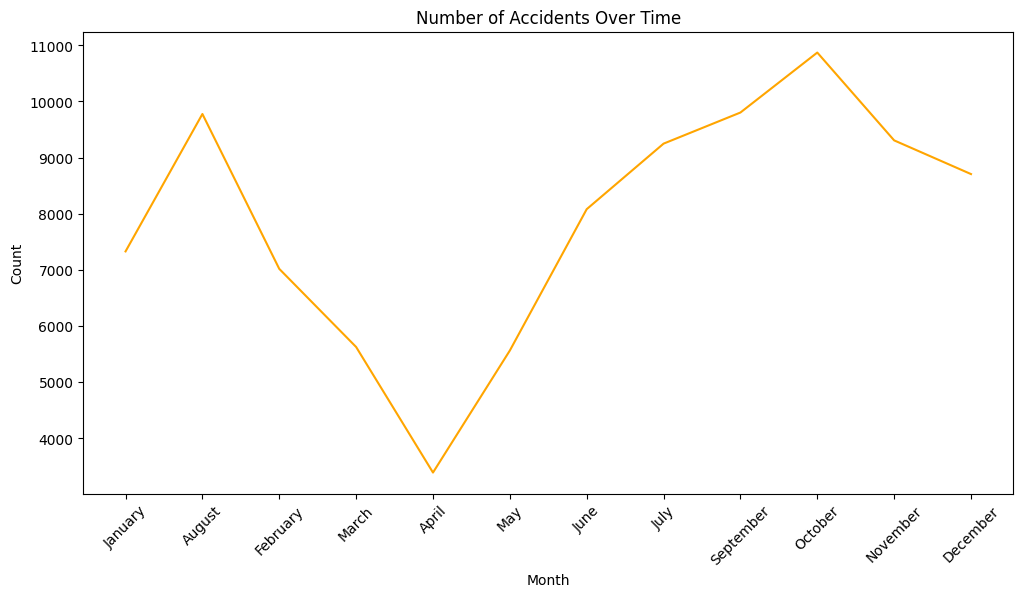

In [ ]:
#Creating a line graph using seaborn & matplotlib with the columns Month and count of Caseno
plt.figure(figsize=(12, 6))
sns.lineplot(x='Month', y='Case No.', data=vehicle_df, estimator='count', ci=None, color='orange')
plt.title('Number of Accidents Over Time')
plt.xlabel('Month')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

Question: Which type of road conditions lead to the most accidents?

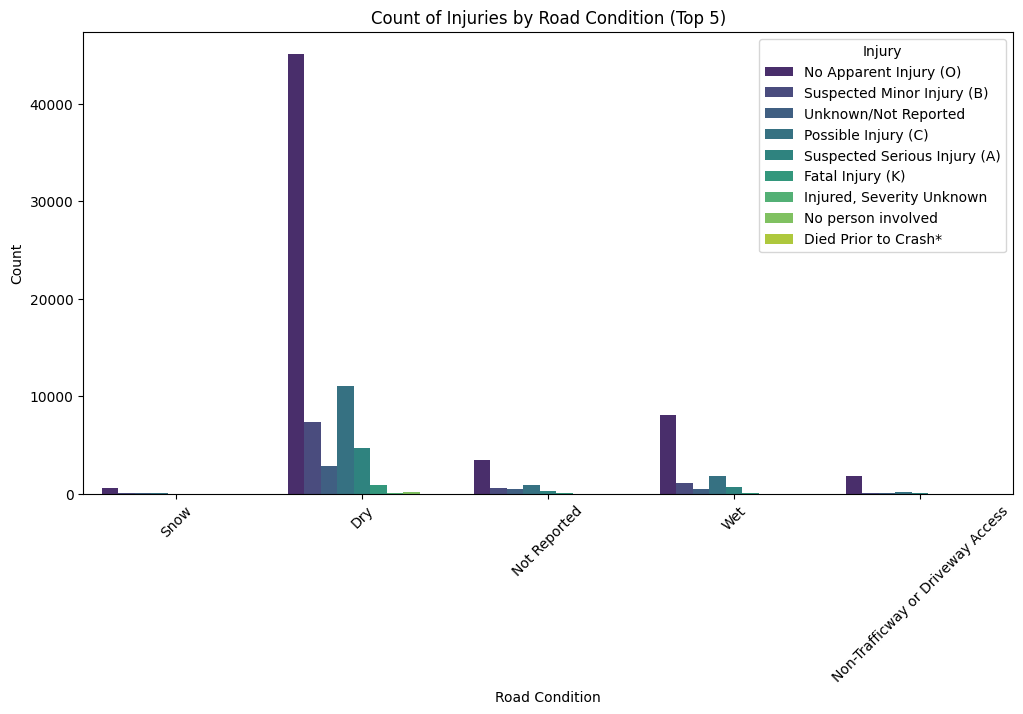

In [ ]:
#Fetching out the top 5 road conditions
top_5_conditions = vehicle_df['Road Condition'].value_counts().head(5).index
#Filtering out the data for just those top 5 conditions
filtered_df = vehicle_df[vehicle_df['Road Condition'].isin(top_5_conditions)]
#Plottin the data in a bar graph
plt.figure(figsize=(12, 6))
sns.countplot(x='Road Condition', hue='Injury', data=filtered_df, palette='viridis')
plt.title('Count of Injuries by Road Condition (Top 5)')
plt.xlabel('Road Condition')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

Question: How does the injury relate to the type of crash?

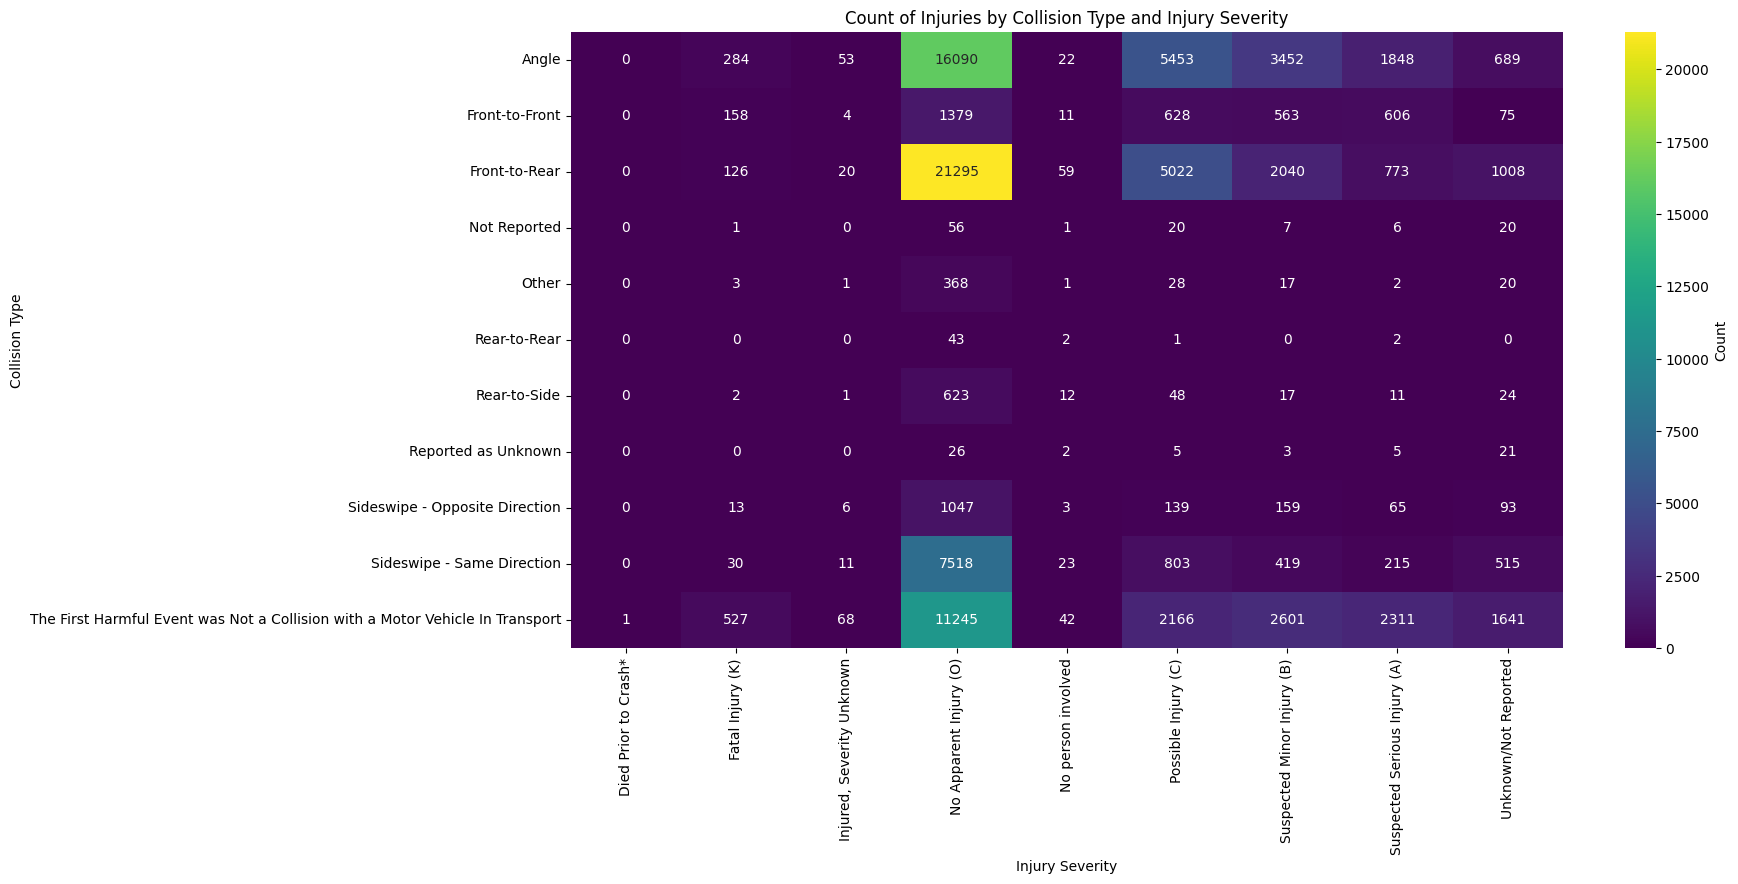

In [ ]:
#Plotting the Collition type column and the Injury column in a heatmap
plt.figure(figsize=(16, 8))
#Agrregating values for the matrix
collision_injury_matrix = pd.crosstab(vehicle_df['Collision Type'], vehicle_df['Injury'])
sns.heatmap(collision_injury_matrix, annot=True, cmap='viridis', fmt='d', cbar_kws={'label': 'Count'})
plt.title('Count of Injuries by Collision Type and Injury Severity')
plt.xlabel('Injury Severity')
plt.ylabel('Collision Type')
plt.show()

**Question:**

What are the primary contributing factors to vehicle collisions in New York City?


---



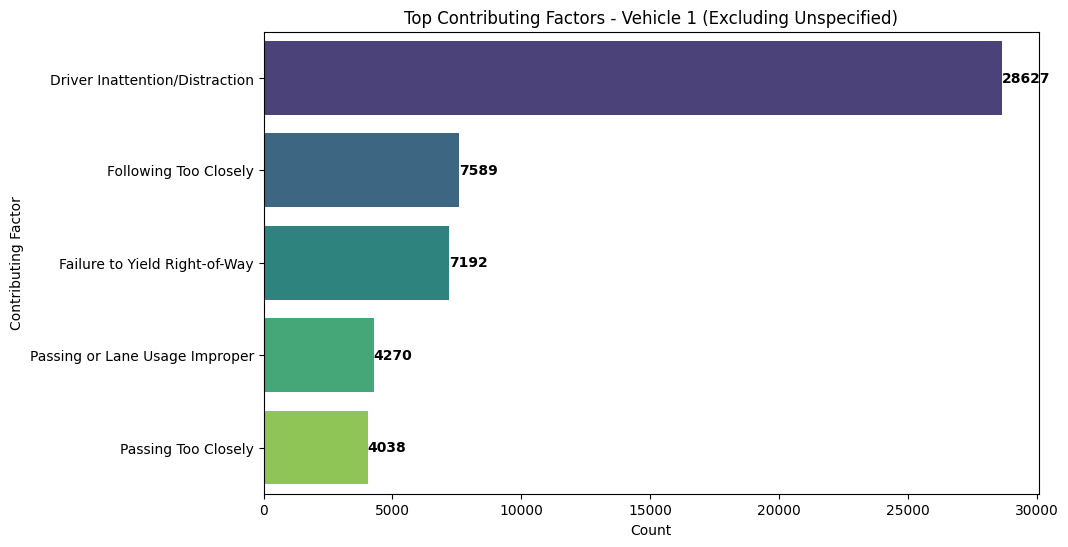

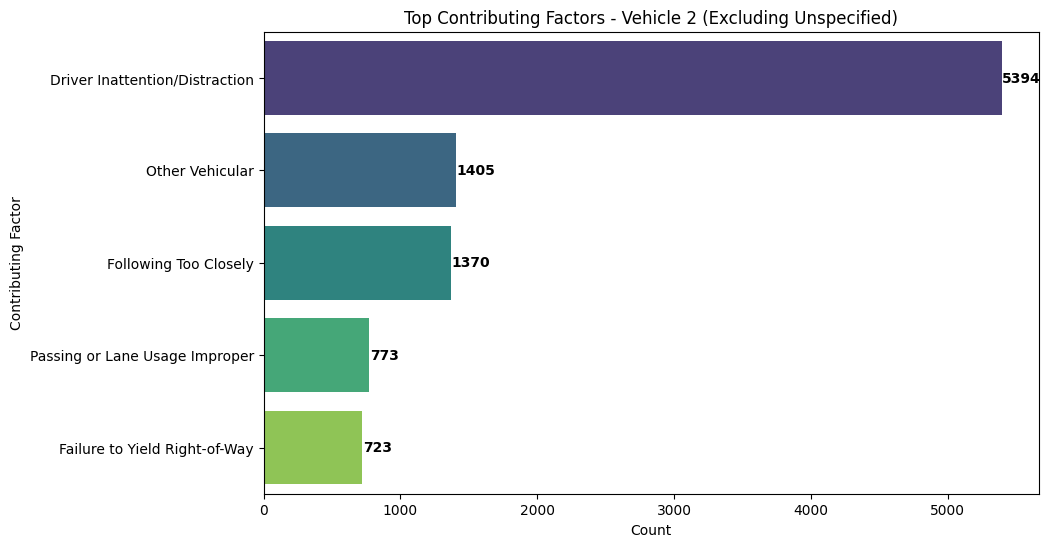

In [ ]:
def plot_top_contributing_factors(column_name, title):
    plt.figure(figsize=(10, 6))

    # Filtering out 'Unspecified' values
    filtered_df = nyc_df[nyc_df[column_name] != 'Unspecified']

    # Getting the top 5 contributing factors
    top_factors = filtered_df[column_name].value_counts().nlargest(5)

    # Bar plot with a custom color palette
    sns.barplot(y=top_factors.index, x=top_factors.values, palette='viridis')

    # Adding data labels to the bars
    for i, v in enumerate(top_factors.values):
        plt.text(v + 5, i, str(v), color='black', va='center', fontweight='bold')

    plt.title(title)
    plt.xlabel('Count')
    plt.ylabel('Contributing Factor')
    plt.show()

# Bar plot for the top 5 contributing factors for Vehicle 1
plot_top_contributing_factors('CONTRIBUTING FACTOR VEHICLE 1', 'Top Contributing Factors - Vehicle 1 (Excluding Unspecified)')

# Bar plot for the top 5 contributing factors for Vehicle 2
plot_top_contributing_factors('CONTRIBUTING FACTOR VEHICLE 2', 'Top Contributing Factors - Vehicle 2 (Excluding Unspecified)')

**Question:**

What is the distribution of collision severity (in terms of the number of persons injured) across the top 5 contributing factors in vehicle collisions?



---



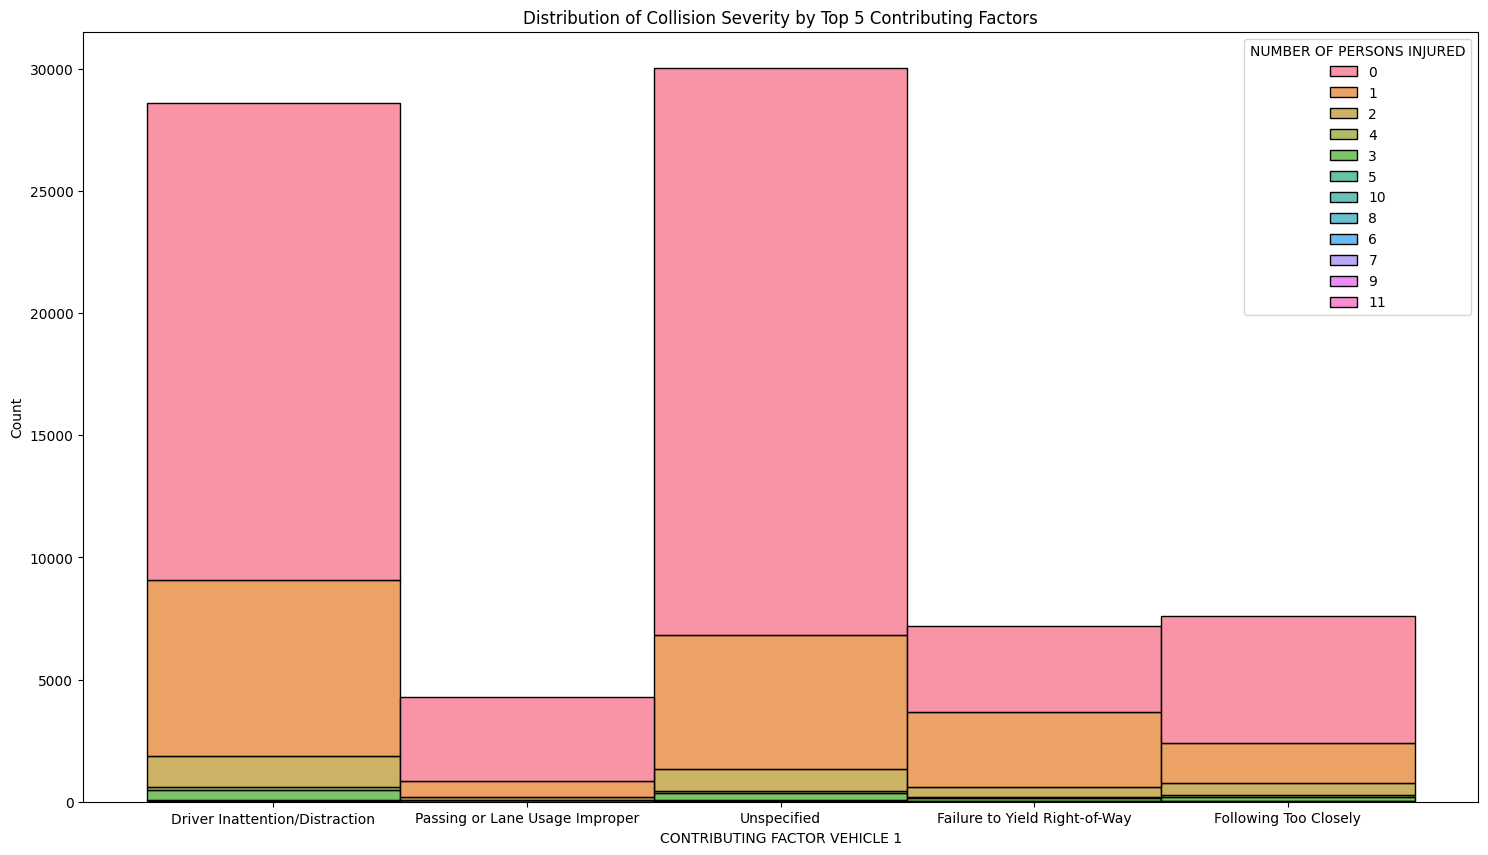

In [ ]:

# Determining the top 5 contributing factors
top_factors = nyc_df['CONTRIBUTING FACTOR VEHICLE 1'].value_counts().nlargest(5).index

# Filtering the DataFrame for only the top 5 contributing factors
filtered_df = nyc_df[nyc_df['CONTRIBUTING FACTOR VEHICLE 1'].isin(top_factors)]

# Setting the figure size to increase the width
plt.figure(figsize=(18, 10))  # Adjust the width (10) and height (6) as needed

# Creating a stacked histogram
sns.histplot(data=filtered_df, x='CONTRIBUTING FACTOR VEHICLE 1', hue='NUMBER OF PERSONS INJURED', multiple='stack')
plt.title('Distribution of Collision Severity by Top 5 Contributing Factors')
plt.show()


In [ ]:
# Merging person_df and vehicle_df on 'Case No.'
combined_df = pd.merge(person_df, vehicle_df, on='Case No.')
combined_df.columns


Index(['Case No.', 'Person No.', 'Region_x', 'PSU', 'Rural/Urban_x', 'Month_x',
       'Harmed_x', 'Collision Type_x', 'Body Type', 'Car Model Year', 'Impact',
       'Age', 'Sex', 'Seat Position', 'Air Bag', 'Alcohol', 'Drugs',
       'Hospital', 'Vehicle Type', 'age_group', 'Strat Injuries', 'Region_y',
       'Rural/Urban_y', 'Month_y', 'Hour', 'Harmed_y', 'Collision Type_y',
       'Hit & Run', 'Truck?', 'Bus?', 'Speed of car', 'Damage', 'Injury',
       'In Vehicle Injury', 'Speed Limit', 'Road Condition', 'Vehicle type'],
      dtype='object')

**Question:**

How does the distribution of the top N vehicle types arriving after crash at hospitals vary, and which experience the highest volume of cases for these specific vehicle types?


---



<Figure size 1200x600 with 0 Axes>

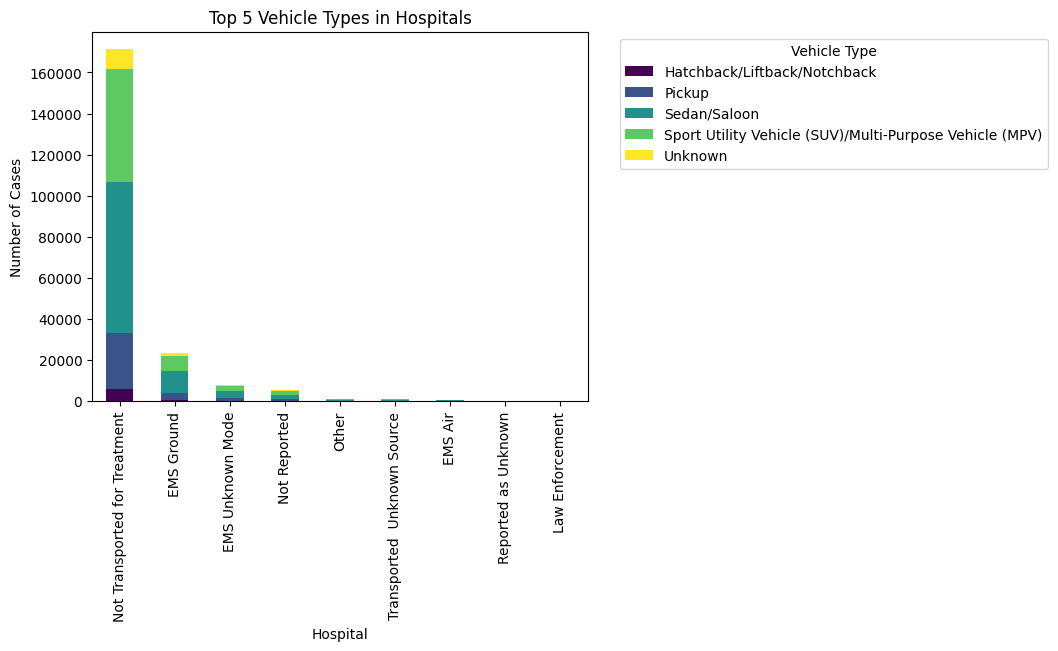

In [ ]:
top_n_vehicle_types = 5

# Calculating the top N most frequent vehicle types
top_vehicle_types = combined_df['Vehicle type'].value_counts().nlargest(top_n_vehicle_types).index

# Filtering the DataFrame for the top N vehicle types
filtered_df = combined_df[combined_df['Vehicle type'].isin(top_vehicle_types)]

# Creating a table of counts for each hospital and vehicle type
hospital_vehicle_counts = filtered_df.groupby('Hospital')['Vehicle type'].value_counts().unstack(fill_value=0)

# Sorting the values for better visualization
hospital_vehicle_counts = hospital_vehicle_counts.reindex(hospital_vehicle_counts.sum(axis=1).sort_values(ascending=False).index)

# Plotting
plt.figure(figsize=(12, 6))
hospital_vehicle_counts.plot(kind='bar', stacked=True, colormap='viridis')
plt.title(f'Top {top_n_vehicle_types} Vehicle Types in Hospitals')
plt.xlabel('Hospital')
plt.ylabel('Number of Cases')
plt.legend(title='Vehicle Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()